## [Thực hành] Phân tích review của khách hàng

## Mô tả bộ dữ liệu bằng lệnh infor() và describe ().

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

data = pd.read_csv('Credit_Scoring.csv',header=0,encoding = "ISO-8859-1")

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Phát hiện cột, dòng chứa dữ liệu khuyết thiếu

In [6]:
# kiểm tra dữ liệu khuyết thiếu
data.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,True,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
data.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29730
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

## Tiến hành xử lý dữ liệu khuyết thiếu
Tiến hành loại bỏ dữ liệu khuyết thiếu, số lượng bản ghi còn lại là bao nhiêu %

In [10]:
# loại bỏ dữ liệu khuyết thiếu
data1 = data.dropna()

# % số lượng bản ghi còn lại
100 * data1.shape[0]/data.shape[0]

80.17894287695344

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

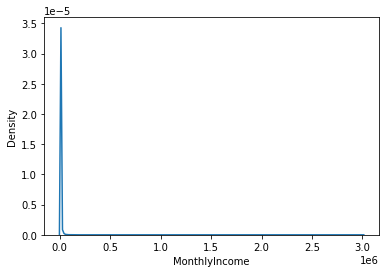

In [12]:
# vẽ biểu đồ phân bố
sns.kdeplot(data=data1["MonthlyIncome"])

In [15]:
# thay thế dữ liệu khuyết thiếu bởi giá trị nội suy theo cột
data2 = data.interpolate(axis=1)
data2.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,False,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

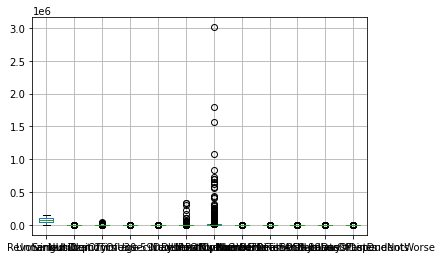

In [16]:
# vẽ biểu đồ boxplot cho các đặc trưng
data2.boxplot()

<AxesSubplot:>

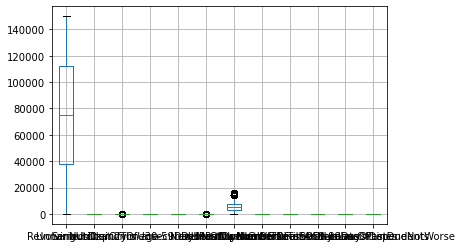

In [22]:
# tính giá trị Q1 và Q3
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)

# tính IQR 
IQR = Q3-Q1

# lọc dữ liệu ngoại lai
data3 = data2[~((data2 < (Q1 - 1.5 * IQR)) | (data2 > (Q3 + 1.5 * IQR))).any(axis=1)]

data3.boxplot()

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

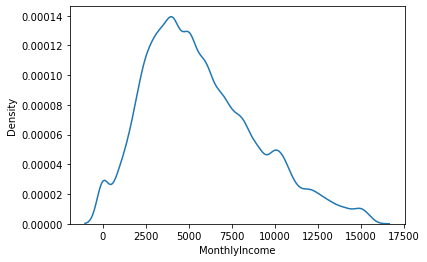

In [23]:
# phân bố dữ liệu trên cột MonthlyIncome
sns.kdeplot(data = data3['MonthlyIncome'])

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
# chuẩn hóa với minmax scaling
scaler = MinMaxScaler()

mms = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

NameError: name 'MinMaxScaler' is not defined

In [30]:
# chuẩn hóa với robust scaling
scaler = RobustScaler()

rbs = scaler.fit_transform(pd.DataFrame(data3['MonthlyIncome']))

In [31]:
# chuẩn hóa với standard scaling
scaler = StandardScaler()

sc = scaler.fit_transform(pd.DataFrame(data3['MonthlyIncome']))

NameError: name 'StandardScaler' is not defined